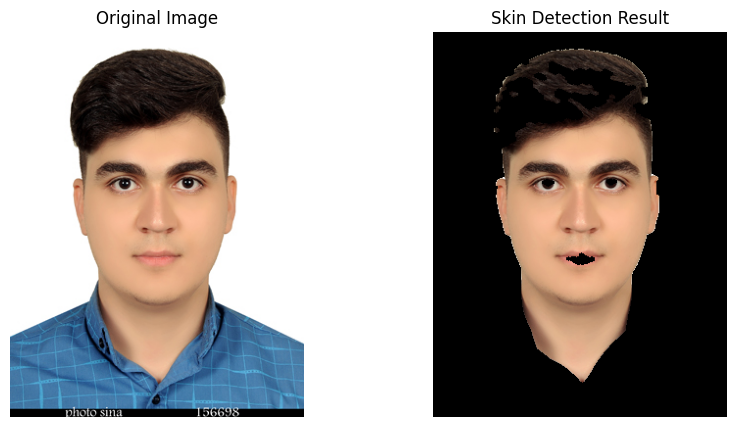

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def skin_detection(image):
    # Convert image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower_threshold = np.array([0, 133, 77], dtype=np.uint8)
    upper_threshold = np.array([255, 173, 127], dtype=np.uint8)

    # Apply skin color thresholding
    skin_mask = cv2.inRange(ycrcb, lower_threshold, upper_threshold)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)

    # Apply the skin mask to the original image
    result = cv2.bitwise_and(image, image, mask=skin_mask)

    return result

# Load the image
image = cv2.imread("ME.JPG")

# Perform skin detection
skin_detected = skin_detection(image)

# Convert BGR to RGB for matplotlib
skin_detected_rgb = cv2.cvtColor(skin_detected, cv2.COLOR_BGR2RGB)

# Display the original image and the skin detection result using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(skin_detected_rgb)
axes[1].set_title("Skin Detection Result")
axes[1].axis("off")
plt.show()

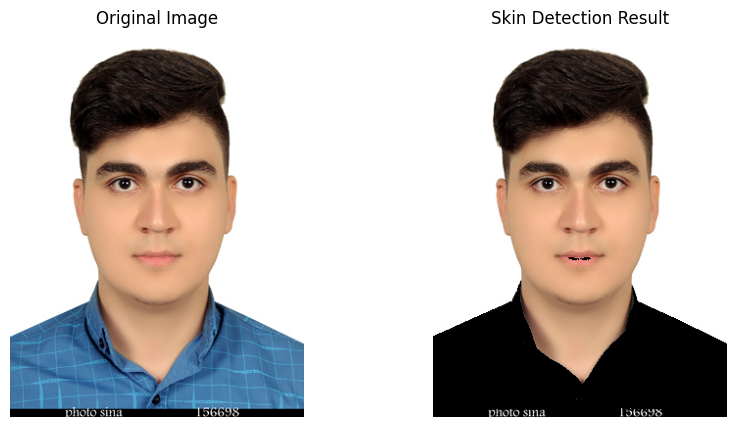

In [8]:
def skin_detection(image):
    # Convert image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower_threshold = np.array([0, 133, 77], dtype=np.uint8)
    upper_threshold = np.array([255, 173, 127], dtype=np.uint8)

    # Apply skin color thresholding
    skin_mask = cv2.inRange(ycrcb, lower_threshold, upper_threshold)

    # Apply morphological operations to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)

    # Apply additional thresholding for lip region
    lip_mask = cv2.inRange(ycrcb, np.array([0, 120, 80], dtype=np.uint8), np.array([255, 180, 130], dtype=np.uint8))
    skin_mask = cv2.bitwise_or(skin_mask, lip_mask)

    # Apply the skin mask to the original image
    result = cv2.bitwise_and(image, image, mask=skin_mask)

    return result

# Load the image
image = cv2.imread("ME.JPG")

# Perform skin detection
skin_detected = skin_detection(image)

# Convert BGR to RGB for matplotlib
skin_detected_rgb = cv2.cvtColor(skin_detected, cv2.COLOR_BGR2RGB)

# Display the original image and the skin detection result using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(skin_detected_rgb)
axes[1].set_title("Skin Detection Result")
axes[1].axis("off")
plt.show()

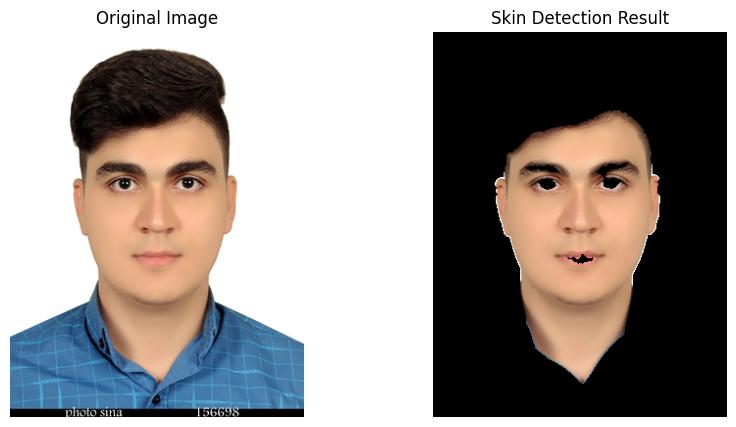

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def skin_detection(image):
    # Convert image to YCrCb color space
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    # Convert image to hsv color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define lower and upper thresholds for skin color in YCrCb space
    lower_threshold_ycrcb = np.array([0, 133, 77], dtype=np.uint8)
    upper_threshold_ycrcb = np.array([255, 173, 127], dtype=np.uint8)

    # Define lower and upper thresholds for skin color in HSV space
    lower_threshold_hsv = np.array([0, 48, 80], dtype=np.uint8)
    upper_threshold_hsv = np.array([20, 255, 255], dtype=np.uint8)

    # Apply skin color thresholding in YCrCb space
    skin_mask_ycrcb = cv2.inRange(ycrcb, lower_threshold_ycrcb, upper_threshold_ycrcb)

    # Apply skin color thresholding in HSV space
    skin_mask_hsv = cv2.inRange(hsv, lower_threshold_hsv, upper_threshold_hsv)

    # Combine skin detection from ycrcb and hsv
    skin_mask = cv2.bitwise_and(skin_mask_ycrcb, skin_mask_hsv)

    # Apply a series of erosions and dilations to the mask using an elliptical kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    skin_mask = cv2.erode(skin_mask, kernel, iterations=2)
    skin_mask = cv2.dilate(skin_mask, kernel, iterations=2)

    # Blur the mask to help remove noise, then apply the mask to the frame
    skin_mask = cv2.GaussianBlur(skin_mask, (3, 3), 0)
    skin = cv2.bitwise_and(image, image, mask=skin_mask)

    return skin


# Load the image
image = cv2.imread("ME.JPG")

# Perform skin detection
skin_detected = skin_detection(image)

# Convert BGR to RGB for matplotlib
skin_detected_rgb = cv2.cvtColor(skin_detected, cv2.COLOR_BGR2RGB)

# Display the original image and the skin detection result using Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(skin_detected_rgb)
axes[1].set_title("Skin Detection Result")
axes[1].axis("off")
plt.show()